<a href="https://colab.research.google.com/github/AnkitPatel745/Retail-Sales-Prediction-Capstone_Project/blob/main/Rossmann_Sales_Prediction_Capstone_Project(ML_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

##**Importing Libraries**

In [116]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pylab
from numpy import math
from scipy  import stats as ss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing Warnings To Ignore the Warning
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [117]:
# Importing the dataset
df_Rstore = pd.read_csv("/content/drive/MyDrive/Datasets/Rossmann Stores Data.csv")
df_store = pd.read_csv("/content/drive/MyDrive/Datasets/store.csv")

In [118]:
# First Look
df_Rstore.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [119]:
# checking columns Names
df_Rstore.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [120]:
# Data Summary
df_Rstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [121]:
# Checking Size Of Data Set
df_Rstore.shape

(1017209, 9)

In [122]:
# checking the length of the column
len(df_Rstore)

1017209

In [123]:
# checking the Unique Values of columns
list1 = ["Promo", "Open", "DayOfWeek" , "StateHoliday" , "SchoolHoliday"]

for i in list1:
  print(i)
  print(df_Rstore[i].unique())
  print("-----------------------")

Promo
[1 0]
-----------------------
Open
[1 0]
-----------------------
DayOfWeek
[5 4 3 2 1 7 6]
-----------------------
StateHoliday
['0' 'a' 'b' 'c' 0]
-----------------------
SchoolHoliday
[1 0]
-----------------------


In [124]:
# Checking number of count of the columns
df_Rstore_column = list1
df_Rstore_counts = pd.DataFrame(df_Rstore[df_Rstore_column].melt(var_name='column', value_name='value').value_counts())\
.rename(columns={0: 'counts'}).sort_values(by=['column', 'counts'])
df_Rstore_counts

counts
column        value        
DayOfWeek     6      144730
              1      144730
              7      144730
              2      145664
              3      145665
              4      145845
              5      145845
Open          0      172817
              1      844392
Promo         1      388080
              0      629129
SchoolHoliday 1      181721
              0      835488
StateHoliday  c        4100
              b        6690
              a       20260
              0      131072
              0      855087


**a = public holiday, b = Easter holiday, c = Christmas, 0 = None**

Indicates if the (Store, Date) was affected by the closure of public schools

In [125]:
# Checking out the Time Peroid Of The Dataset 
print('Minimum date in given dataset is = ',df_Rstore['Date'].min())
print('Maximum date in given dataset is = ',df_Rstore['Date'].max())

Minimum date in given dataset is =  2013-01-01
Maximum date in given dataset is =  2015-07-31


**The Dataset is from 1 January 2013 to 31 July 2015 , i.e. approx. 2.5 yrs.**

In [126]:
# First Look
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [127]:
# Data Summary
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [128]:
# checking columns present
df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [129]:
# checking the Unique Values of columns
list2 = ['StoreType', 'Assortment',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

for i in list2:
  print(i)
  print(df_store[i].unique())
  print("-----------------------")

StoreType
['c' 'a' 'd' 'b']
-----------------------
Assortment
['a' 'c' 'b']
-----------------------
CompetitionOpenSinceMonth
[ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
-----------------------
CompetitionOpenSinceYear
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
-----------------------
Promo2
[0 1]
-----------------------
Promo2SinceWeek
[nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
-----------------------
Promo2SinceYear
[  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
-----------------------
PromoInterval
[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
-----------------------


In [130]:
# Checking number of count of the columns
df_store_column = list2
df_store_counts = pd.DataFrame(df_store[df_store_column].melt(var_name='column', value_name='value').value_counts()).rename(columns={0: 'counts'}).sort_values(by=['column', 'counts'])
df_store_counts

counts
column                    value                  
Assortment                b                     9
                          c                   513
                          a                   593
CompetitionOpenSinceMonth 1.0                  14
                          8.0                  39
...                                           ...
PromoInterval             Jan,Apr,Jul,Oct     335
StoreType                 b                    17
                          c                   148
                          d                   348
                          a                   602

[78 rows x 1 columns]

In [131]:
# Checking Size OF dataset1
df_store.shape

(1115, 10)

In [132]:
# checking the length of the column
len(df_store )

1115

###**Merging The Datasets**
On the basis of common column present on both the datasets.

In [133]:
# Merging both the dataset on store columnn because it present on both the dataset
df = pd.merge(df_Rstore,df_store , on = 'Store', how='left' )

In [134]:
# First Look
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [135]:
# Size Of The Data set after Merging
df.shape

(1017209, 18)

In [136]:
# Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [137]:
# changing 'date' column from object to pandas datetime
df['Date'] = pd.to_datetime( df['Date'] ) 
df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [138]:
df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,509178
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,2015-06-09 00:00:00,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,293122
first,NaN,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,NaN


In [139]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
PromoInterval                508031
Promo2SinceYear              508031
Promo2SinceWeek              508031
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
CompetitionDistance            2642
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
PromoInterval                49.94
Promo2SinceYear              49.94
Promo2SinceWeek              49.94
CompetitionOpenSinceYear     31.79
CompetitionOpenSinceMonth    31.79
CompetitionDistance           0.26
dtype: float64


##Filling out NANs
  competition_distance:

    I'll assume that if the value is missing it's because there'no competitor
    close to the store. Thus if I input a distance greater than the maximum
    distance of the column it's the same as there'no competitor close.

    The maximum distance is 75.860m. So, if the value is missing, I will input 200.000m

In [140]:
df['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

#### The features Promo2SinceWeek, Promo2SincYear and PromoInterval are NaN for stores that didn't participate in Promo2(i.e. Promo2=0). 
####The lack of Promo2 means that all these features are unimportant.
####Hence, we can **replace NaN** values in these **3 features with 0.** 
#### Zero will represent that the particular store didn't participate in Promo2.

In [141]:
df['CompetitionDistance'] = df['CompetitionDistance'].apply( lambda x: 200000.0 if math.isnan( x ) else x) 

In [142]:
# competition_open_since_month
df['CompetitionOpenSinceMonth'].fillna( 0, inplace=True )

In [143]:
#competition_open_since_year
df['CompetitionOpenSinceYear'].fillna( 0, inplace=True )

In [144]:
#If there are missing values in these columns, it's because the store is not participating in promo2. 
#So, we'll fill it out with the present date.
# df['Promo2SinceWeek'].fillna( df['Date'].dt.isocalendar().week, inplace=True )
# df['Promo2SinceYear'].fillna( df['Date'].dt.year, inplace=True )

In [145]:
# month_map = {1: 'Jan',  2: 'Feb',  3: 'Mar',  4: 'Apr',  5: 'May',  6: 'Jun',  7: 'Jul',  8: 'Aug',  9: 'Sep',  10: 'Oct', 11: 'Nov', 12: 'Dec'}

# df['PromoInterval'].fillna('', inplace=True) 

# # getting month abreviation
# df['month_map'] = df['Date'].dt.strftime( "%b" ) 

# df['is_promo'] = df[['PromoInterval', 'month_map']].apply(lambda x: x['month_map'] in x['PromoInterval'].split( ',' ), axis='columns').astype('int')

In [146]:
#for all 3 features Promo2SinceWeek, Promo2SincYear and PromoInterval

df['Promo2SinceWeek'].fillna(0, inplace = True)
df['Promo2SinceYear'].fillna(0, inplace = True)
df['PromoInterval'].fillna(0, inplace = True)

####The figure above shows that most of the stores have their competition between 1km to 5km of their location.

In [147]:
#df['CompetitionDistance'].fillna(str(df['CompetitionDistance'].mean()),inplace=True)

In [148]:
# Removing Duplicate Values From The Data Set
df.drop_duplicates()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [149]:
# Functions used in this project for outlier determination (Not to Plot The Same Thing Again and Again)
""" Visualize the Numerical Features """
def visualize_num_feature(df):
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df)
    plt.subplot(1,2,2)
    sns.distplot(df, bins=20)
    plt.show()
 
""" Use IQR rule to identify potential outliers"""
def stat_summary(df):
    stat =  df.describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}' .format(upper, lower))

Visulaize Sales Feature


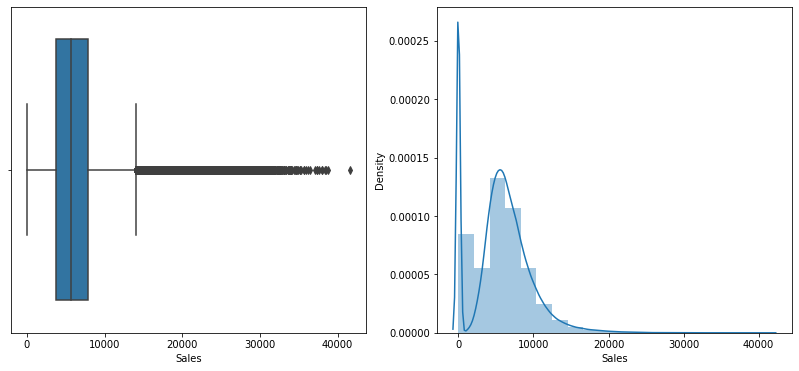

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64
The upper and lower bounds for suspected outliers are 14049.5 and -2466.5


In [150]:
# plotting the boxplot for finding the Outlier in the sales feature of the Dataset
### Sales
print('Visulaize Sales Feature')
visualize_num_feature(df.Sales)
stat_summary(df.Sales)

Visulaize Customers Feature


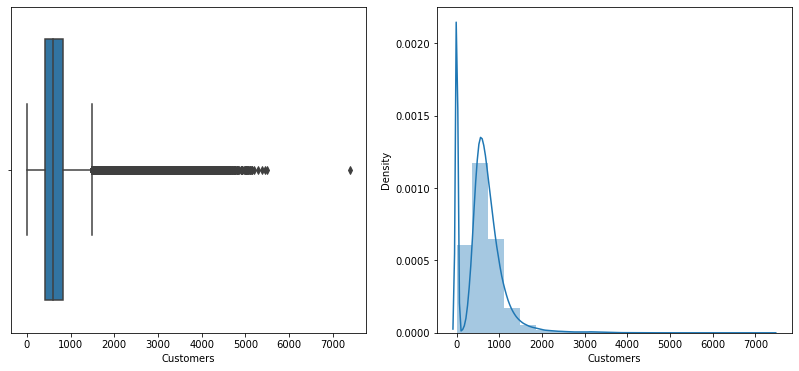

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64
The upper and lower bounds for suspected outliers are 1485.0 and -243.0


In [151]:
# plotting the boxplot and Density for finding the Outlier in the Customers feature of the Dataset
### Customers
print('Visulaize Customers Feature')
visualize_num_feature(df.Customers)
stat_summary(df.Customers)

Visulaize Open Feature


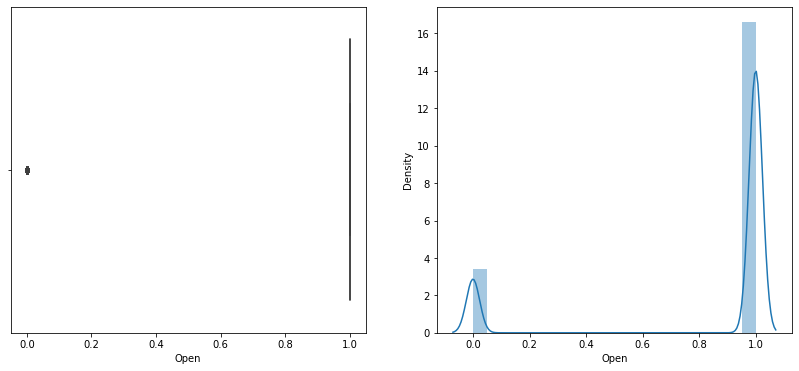

count    1.017209e+06
mean     8.301067e-01
std      3.755392e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: Open, dtype: float64
The upper and lower bounds for suspected outliers are 1.0 and 1.0


In [152]:
# plotting the boxplot and Density for finding the Outlier in the Open feature of the Dataset
### Open
print('Visulaize Open Feature')
visualize_num_feature(df.Open)
stat_summary(df.Open)

Visulaize CompetitionDistance Feature


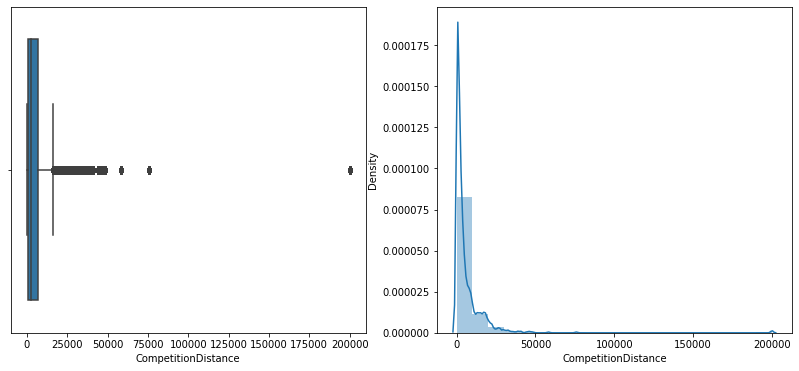

count    1.017209e+06
mean     5.935443e+03
std      1.254765e+04
min      2.000000e+01
25%      7.100000e+02
50%      2.330000e+03
75%      6.910000e+03
max      2.000000e+05
Name: CompetitionDistance, dtype: float64
The upper and lower bounds for suspected outliers are 16210.0 and -8590.0


In [153]:
# plotting the boxplot and Density for finding the Outlier in the CompetitionDistance Dataset
### CompetitionDistance
print('Visulaize CompetitionDistance Feature')
visualize_num_feature(df.CompetitionDistance)
stat_summary(df.CompetitionDistance)

In [154]:
# Replacing The greater than 10 values with median value
#df.loc[df.CompetitionDistance > 20000, 'CompetitionDistance'] = df.loc[df['CompetitionDistance']<20000,'CompetitionDistance'].median()

Visulaize CompetitionOpenSinceMonth Feature


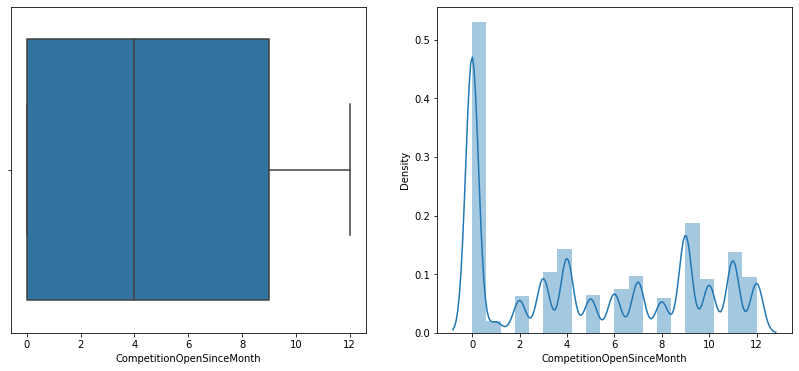

count    1.017209e+06
mean     4.926878e+00
std      4.283543e+00
min      0.000000e+00
25%      0.000000e+00
50%      4.000000e+00
75%      9.000000e+00
max      1.200000e+01
Name: CompetitionOpenSinceMonth, dtype: float64
The upper and lower bounds for suspected outliers are 22.5 and -13.5


In [155]:
# plotting the boxplot and Density for finding the Outlier in the CompetitionDistance Dataset
### CompetitionDistance
print('Visulaize CompetitionOpenSinceMonth Feature')
visualize_num_feature(df.CompetitionOpenSinceMonth)
stat_summary(df.CompetitionOpenSinceMonth)

# Using Isolation Forest to remove outliers in the dataset


In [156]:
from sklearn.ensemble import IsolationForest

In [157]:
isolation_forest = IsolationForest(n_estimators=50, contamination=0.01)
isolation_forest.fit(df['Sales'].values.reshape(-1, 1))
df['anomaly_score_univariate_sales'] = isolation_forest.decision_function(df['Sales'].values.reshape(-1, 1))
df['outlier_univariate_sales'] = isolation_forest.predict(df['Sales'].values.reshape(-1, 1))

It is clear intution that our outliers in Sales would be above 20000.

In [158]:
df[(df['outlier_univariate_sales']==-1)& (df['Sales']<20000)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,anomaly_score_univariate_sales,outlier_univariate_sales
124,125,5,2015-07-31,18227,2041,1,1,0,1,a,a,760.0,12.0,2005.0,0,0.0,0.0,0,-0.018513,-1
210,211,5,2015-07-31,17286,1659,1,1,0,1,a,c,350.0,11.0,2006.0,0,0.0,0.0,0,-0.001948,-1
319,320,5,2015-07-31,19898,2316,1,1,0,1,a,c,210.0,9.0,2012.0,0,0.0,0.0,0,-0.048237,-1
334,335,5,2015-07-31,17867,2592,1,1,0,1,b,a,90.0,0.0,0.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-0.020511,-1
512,513,5,2015-07-31,19959,2177,1,1,0,1,a,a,400.0,8.0,2013.0,0,0.0,0.0,0,-0.051357,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014706,842,4,2013-01-03,18995,1107,1,0,0,1,d,c,1200.0,11.0,2007.0,0,0.0,0.0,0,-0.033843,-1
1014978,1114,4,2013-01-03,18463,3211,1,0,0,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0,-0.029570,-1
1015230,251,3,2013-01-02,19371,2491,1,0,0,1,a,c,340.0,0.0,0.0,0,0.0,0.0,0,-0.036905,-1
1015767,788,3,2013-01-02,17934,1791,1,0,0,1,a,c,1530.0,3.0,2013.0,0,0.0,0.0,0,-0.019512,-1


In [159]:
# Total outliers 
len(df[df['outlier_univariate_sales']==-1])

9994

In [160]:
# Subsetting DF other than outliers.
df = df[df['outlier_univariate_sales']==1]

In [161]:
# Removing Isolation Forest columns
df.drop(['anomaly_score_univariate_sales','outlier_univariate_sales'],axis = 1, inplace=True)

Visulaize Sales Feature


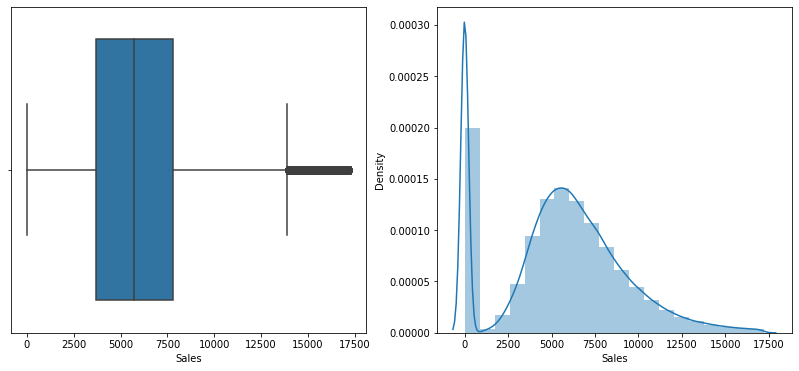

count    1.007215e+06
mean     5.629756e+03
std      3.573409e+03
min      0.000000e+00
25%      3.700000e+03
50%      5.709000e+03
75%      7.777000e+03
max      1.722800e+04
Name: Sales, dtype: float64
The upper and lower bounds for suspected outliers are 13892.5 and -2415.5


In [162]:
# sns.boxplot(df['Sales'])
# plotting the boxplot for finding the Outlier in the sales feature of the Dataset
### Sales
print('Visulaize Sales Feature')
visualize_num_feature(df.Sales)
stat_summary(df.Sales)

Visulaize Customers Feature


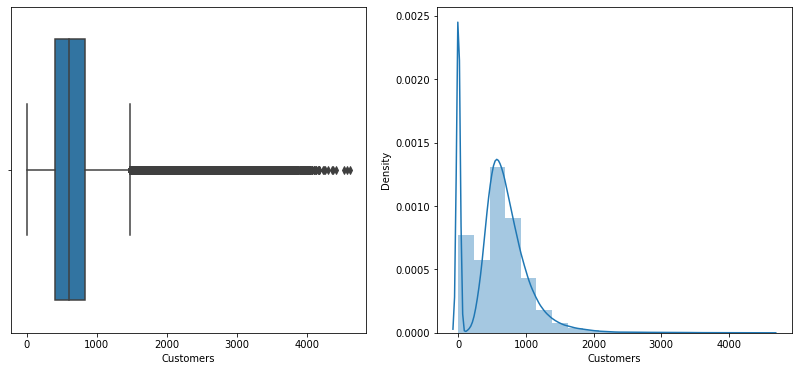

count    1.007215e+06
mean     6.153399e+02
std      4.235957e+02
min      0.000000e+00
25%      4.010000e+02
50%      6.060000e+02
75%      8.280000e+02
max      4.614000e+03
Name: Customers, dtype: float64
The upper and lower bounds for suspected outliers are 1468.5 and -239.5


In [163]:
# sns.boxplot(df['Customers'])
# plotting the boxplot and Density for finding the Outlier in the Customers feature of the Dataset
### Customers
print('Visulaize Customers Feature')
visualize_num_feature(df.Customers)
stat_summary(df.Customers)

Visulaize CompetitionDistance Feature


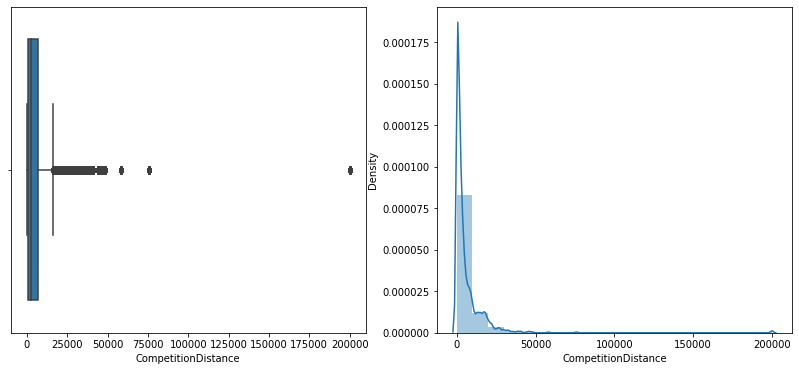

count    1.007215e+06
mean     5.968593e+03
std      1.258458e+04
min      2.000000e+01
25%      7.200000e+02
50%      2.380000e+03
75%      6.920000e+03
max      2.000000e+05
Name: CompetitionDistance, dtype: float64
The upper and lower bounds for suspected outliers are 16220.0 and -8580.0


In [164]:
# plotting the boxplot and Density for finding the Outlier in the CompetitionDistance Dataset
### CompetitionDistance
print('Visulaize CompetitionDistance Feature')
visualize_num_feature(df.CompetitionDistance)
stat_summary(df.CompetitionDistance)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007215 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1007215 non-null  int64         
 1   DayOfWeek                  1007215 non-null  int64         
 2   Date                       1007215 non-null  datetime64[ns]
 3   Sales                      1007215 non-null  int64         
 4   Customers                  1007215 non-null  int64         
 5   Open                       1007215 non-null  int64         
 6   Promo                      1007215 non-null  int64         
 7   StateHoliday               1007215 non-null  object        
 8   SchoolHoliday              1007215 non-null  int64         
 9   StoreType                  1007215 non-null  object        
 10  Assortment                 1007215 non-null  object        
 11  CompetitionDistance        1007215 no

Date columns to Date time and extract month and year.


In [166]:
import datetime

In [167]:
# # Seperating month, year and day from date.
# df['Month'] = pd.DatetimeIndex(df['Date']).month
# df['Year'] = pd.DatetimeIndex(df['Date']).year
# df['Day'] = pd.DatetimeIndex(df['Date']).day

In [168]:
# df.drop(['Date'],axis = 1, inplace=True)

###Change Data Types
    Some features has float as type but they should be integer.
    So, they're going to be changed.

In [169]:
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].astype( int )
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].astype( int )
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].astype( int )
df['Promo2SinceYear'] = df['Promo2SinceYear'].astype( int )
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].astype( int )

In [170]:
#StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.
#Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
# df["StateHoliday"] = df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

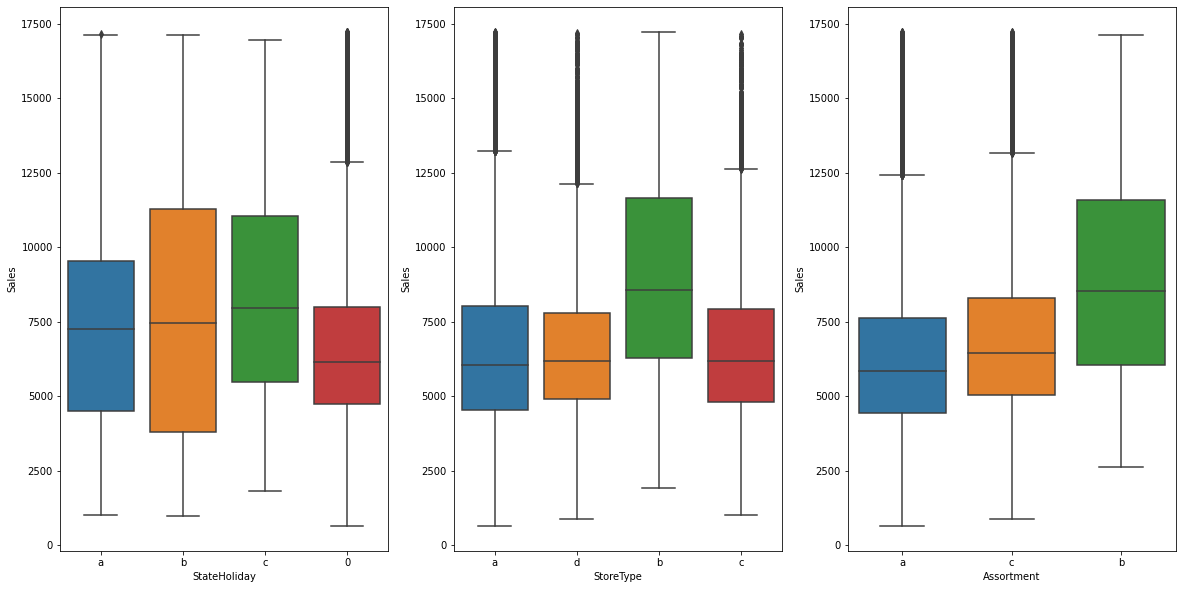

In [171]:
# plot boxplots of categorical features against target variable
plt.figure(figsize=(20,10))
aux1 = df[(df['StateHoliday'] != '0') & (df['Sales'] > 0)]

plt.subplot (1, 3, 1)
sns.boxplot(x='StateHoliday', y= 'Sales', data=aux1);

plt.subplot (1, 3, 2)
sns.boxplot(x='StoreType', y= 'Sales', data=aux1);

plt.subplot (1, 3, 3)
sns.boxplot(x='Assortment', y= 'Sales', data=aux1);

In [172]:
# plt.figure(figsize=(20,10))
# ss.probplot( df['Sales'], dist = 'norm', plot = pylab )
# plt.show()


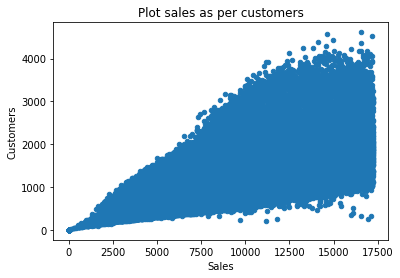

In [173]:

df.plot(kind='scatter',x='Sales',y='Customers')
plt.title("Plot sales as per customers")
plt.figure(figsize=(20,20))
plt.show()

In [174]:
# year
df['Year'] = df['Date'].dt.year

# month
df['Month'] = df['Date'].dt.month

# day
df['Day'] = df['Date'].dt.day

# week of year
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['WeekOfYear'] = df['WeekOfYear'].astype( int )

# year week
df['YearWeek'] = df['Date'].dt.strftime( '%Y-%W' )

In [175]:
df['Year'].unique()

array([2015, 2014, 2013])

In [176]:
# dividing data in numerical and categorical
num_attributes = df.select_dtypes( include = ['int32', 'int64', 'float64'] )
cat_attributes = df.select_dtypes( exclude = ['int32', 'int64', 'float64', 'datetime64[ns]'] )

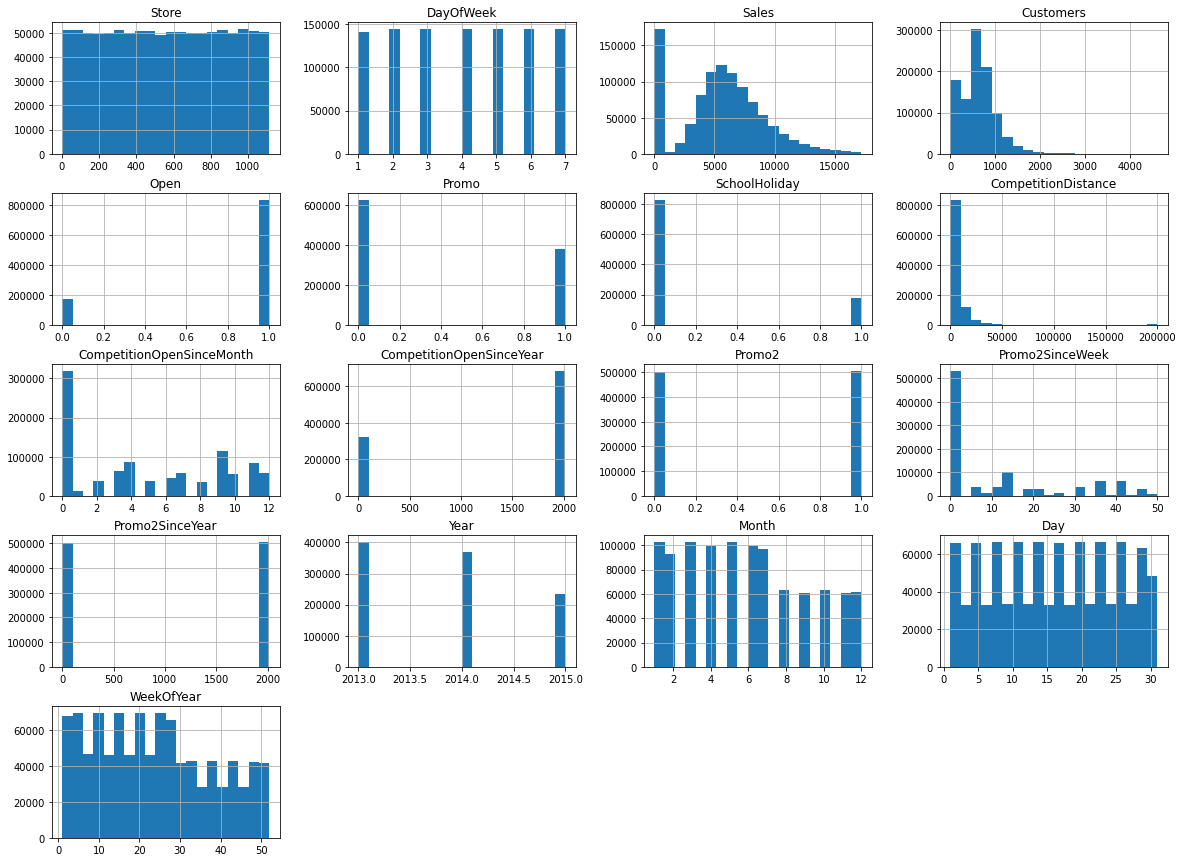

In [177]:
num_attributes.hist( bins = 20 ,figsize=(20,15));

In [178]:
#assortment
df['Assortment'] = df['Assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )

#state holiday
df['StateHoliday'] = df['StateHoliday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

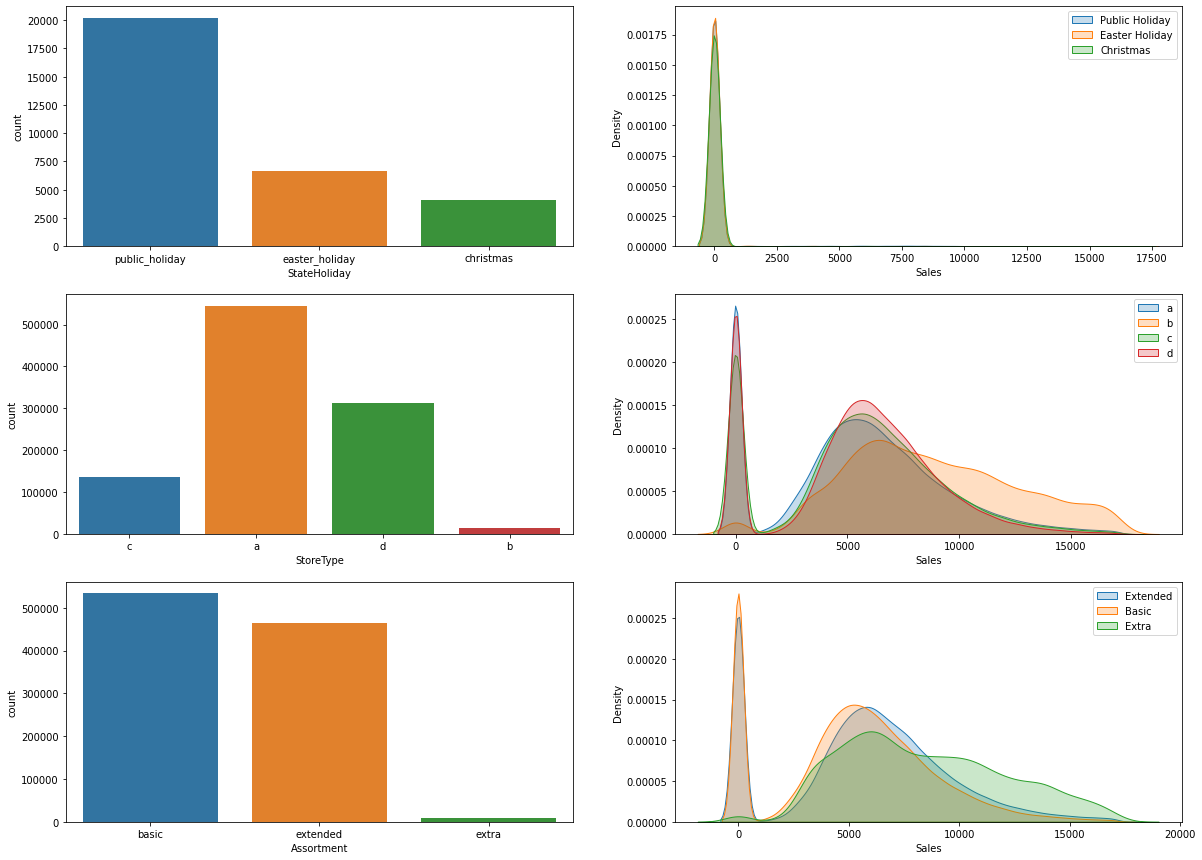

In [179]:
# state_holiday
plt.figure(figsize=(20,15))
plt.subplot( 3, 2, 1 )
a = df[df['StateHoliday'] != 'regular_day']
sns.countplot( a['StateHoliday'] )

plt.subplot( 3, 2, 2 )
sns.kdeplot( df[df['StateHoliday'] == 'public_holiday']['Sales'], label='Public Holiday', shade=True )
sns.kdeplot( df[df['StateHoliday'] == 'easter_holiday']['Sales'], label='Easter Holiday', shade=True )
sns.kdeplot( df[df['StateHoliday'] == 'christmas']['Sales'], label='Christmas', shade=True )
plt.legend()

# store_type
plt.subplot( 3, 2, 3 )
sns.countplot( df['StoreType'] )

plt.subplot( 3, 2, 4 )
sns.kdeplot( df[df['StoreType'] == 'a']['Sales'], label='a', shade=True )
sns.kdeplot( df[df['StoreType'] == 'b']['Sales'], label='b', shade=True )
sns.kdeplot( df[df['StoreType'] == 'c']['Sales'], label='c', shade=True )
sns.kdeplot( df[df['StoreType'] == 'd']['Sales'], label='d', shade=True )
plt.legend()

# assortment
plt.subplot( 3, 2, 5 )
sns.countplot( df['Assortment'] )

plt.subplot( 3, 2, 6 )
sns.kdeplot( df[df['Assortment'] == 'extended']['Sales'], label='Extended', shade=True )
sns.kdeplot( df[df['Assortment'] == 'basic']['Sales'], label='Basic', shade=True )
sns.kdeplot( df[df['Assortment'] == 'extra']['Sales'], label='Extra', shade=True )
plt.legend();

Conclusions:

There's a difference for the three types of state holiday. Based on that difference, the model could better adjust its predictions i, for isntance, it's christmas period;
For different type of stores, sales have a different behavior. For instance, store of type b have sales less concentrated than the others;
there's no much difference between assortments extended and basic, but it's clear that they are different than Extra.

In sum, all these three features are considered important to the model since they can bring information about the target variable.

In [180]:
# counting values for each class in assortment
for index,value in zip(df['Assortment'].value_counts().index, df['Assortment'].value_counts()):
    print(index,value)

basic 533580
extended 465467
extra 8168



--> since there's a difference in quantity between all three classes, I'll use the average as a comparison. Furthermore, I'll concentate in 'basic' and 'extended' which are two extremes of the feature.

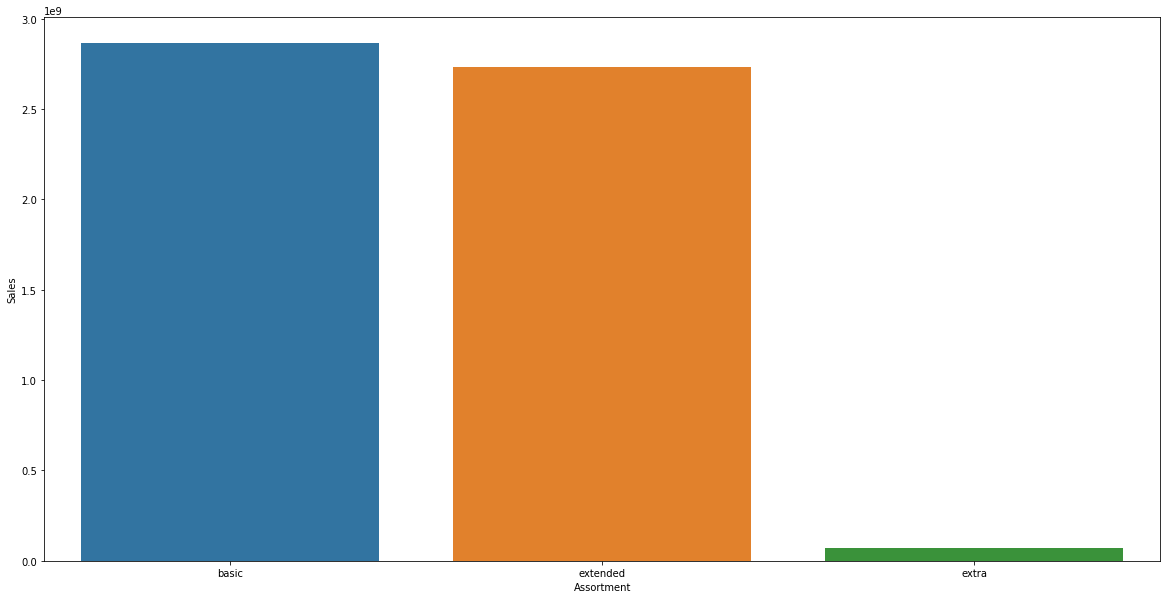

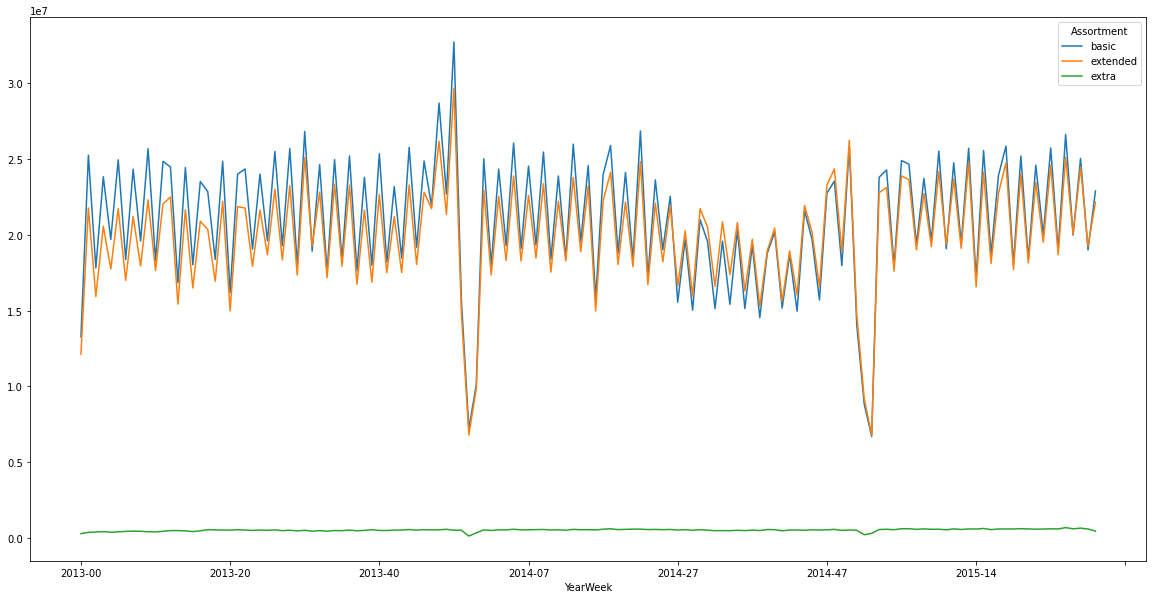

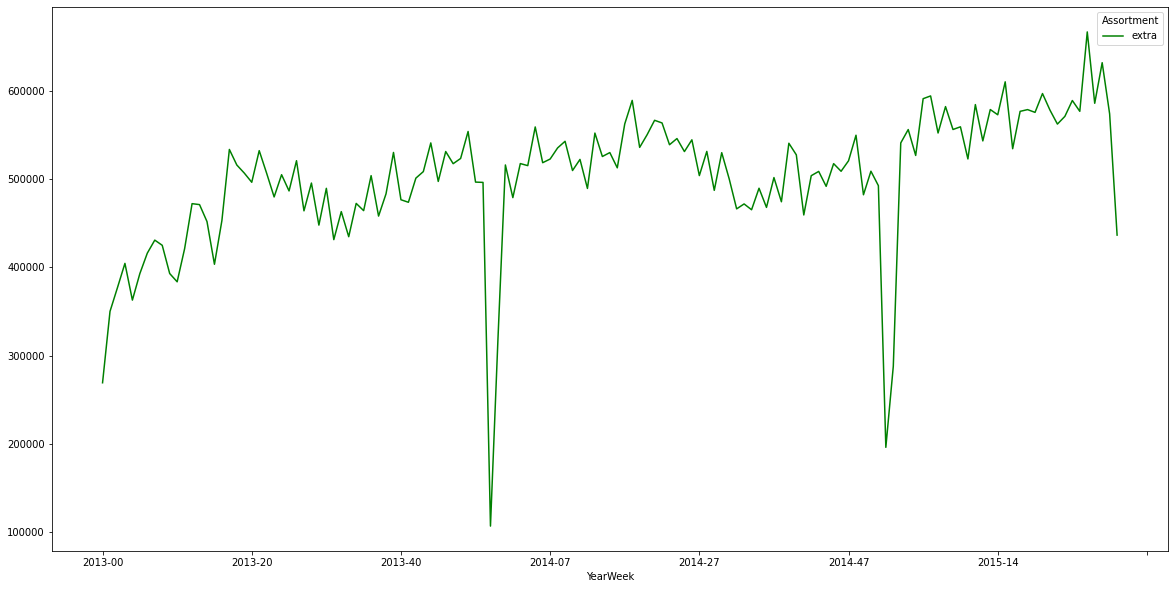

In [181]:
test_1 = df[['Assortment', 'Sales']].groupby( 'Assortment' ).sum().reset_index()
plt.figure(figsize=(20,10))
sns.barplot( x='Assortment', y='Sales', data = test_1 )

test_2 = df[['YearWeek', 'Assortment', 'Sales']].groupby( ['YearWeek', 'Assortment'] ).sum().reset_index()

test_2.pivot( index='YearWeek', columns='Assortment', values='Sales' ).plot(figsize=(20,10))

test_3 = test_2[test_2['Assortment'] == 'extra']
test_3.pivot( index = 'YearWeek', columns = 'Assortment', values = 'Sales').plot( color = 'g',figsize=(20,10) );


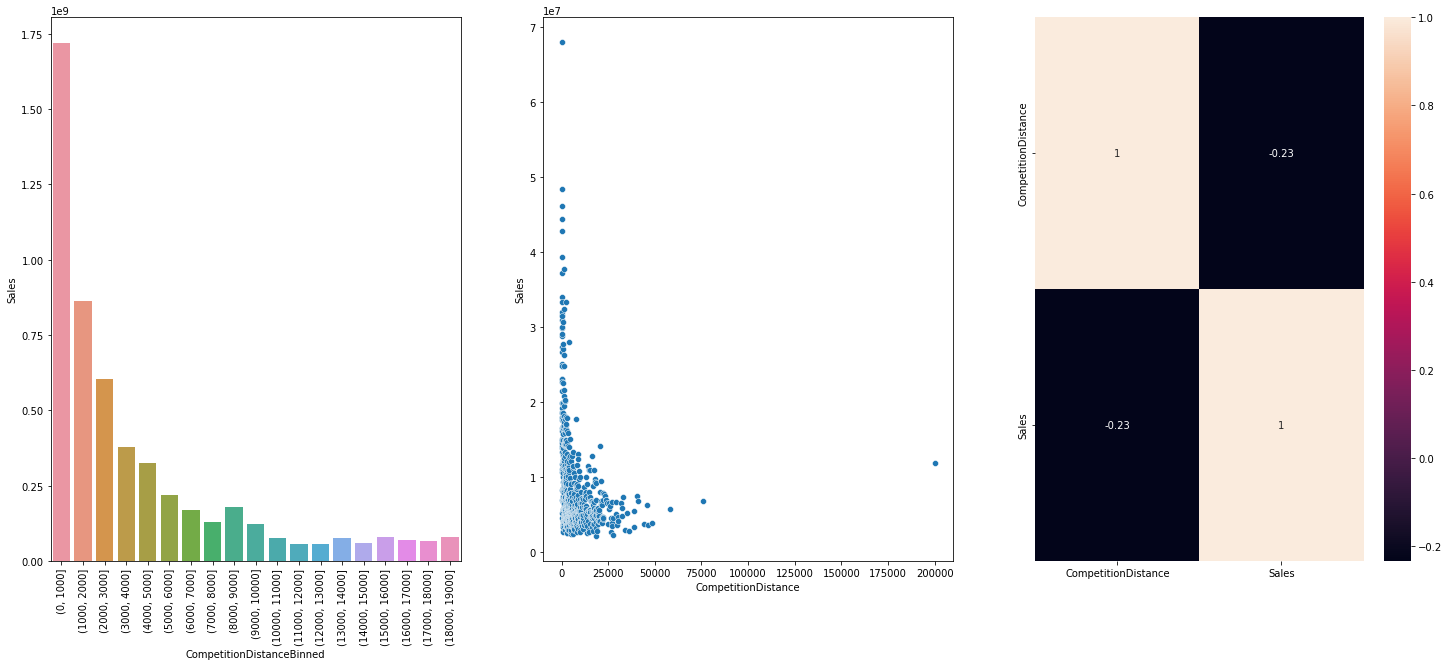

In [182]:
test1 = df[['CompetitionDistance', 'Sales']].groupby( 'CompetitionDistance' ).sum().reset_index()

# creating bins to group the data by bins to better visualize
bins = list( np.arange(0, 20000, 1000) )

test1['CompetitionDistanceBinned'] = pd.cut(test1['CompetitionDistance'], bins = bins )

test2 = test1[['CompetitionDistanceBinned', 'Sales']].groupby( 'CompetitionDistanceBinned' ).sum().reset_index()

plt.figure(figsize=(25,10))

plt.subplot( 1, 3, 1 )
sns.barplot( x='CompetitionDistanceBinned', y = 'Sales', data = test2 )
plt.xticks( rotation = 90 )

plt.subplot( 1, 3, 2 )
sns.scatterplot( x = 'CompetitionDistance', y = 'Sales', data = test1);

plt.subplot( 1, 3, 3 )
sns.heatmap( test1.corr( method='pearson' ), annot = True );

In [183]:
df[['Promo', 'Promo2', 'Sales']].groupby( ['Promo', 'Promo2'] ).sum().reset_index()

,Promo,Promo2,Sales
0,0,0,1431098525
1,0,1,1283532973
2,1,0,1516682453
3,1,1,1439061082


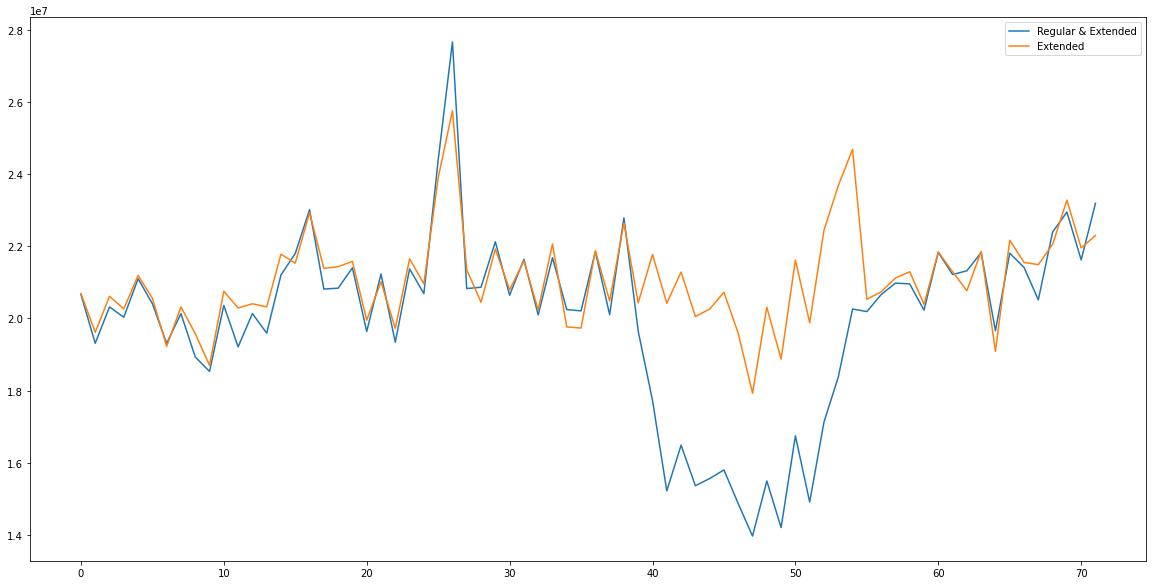

In [184]:
test1 = df[( df['Promo'] == 1 ) & ( df['Promo2'] == 1 )][['YearWeek', 'Sales']].groupby( 'YearWeek' ).sum().reset_index()

ax = test1.plot(figsize=(20,10))

test2 = df[( df['Promo'] == 1 ) & ( df['Promo2'] == 0 )][['YearWeek', 'Sales']].groupby( 'YearWeek' ).sum().reset_index()
test2.plot( ax=ax )

ax.legend( labels=['Regular & Extended', 'Extended']);

In [185]:
df['StateHoliday'].value_counts()


regular_day       976237
public_holiday     20214
easter_holiday      6669
christmas           4095
Name: StateHoliday, dtype: int64

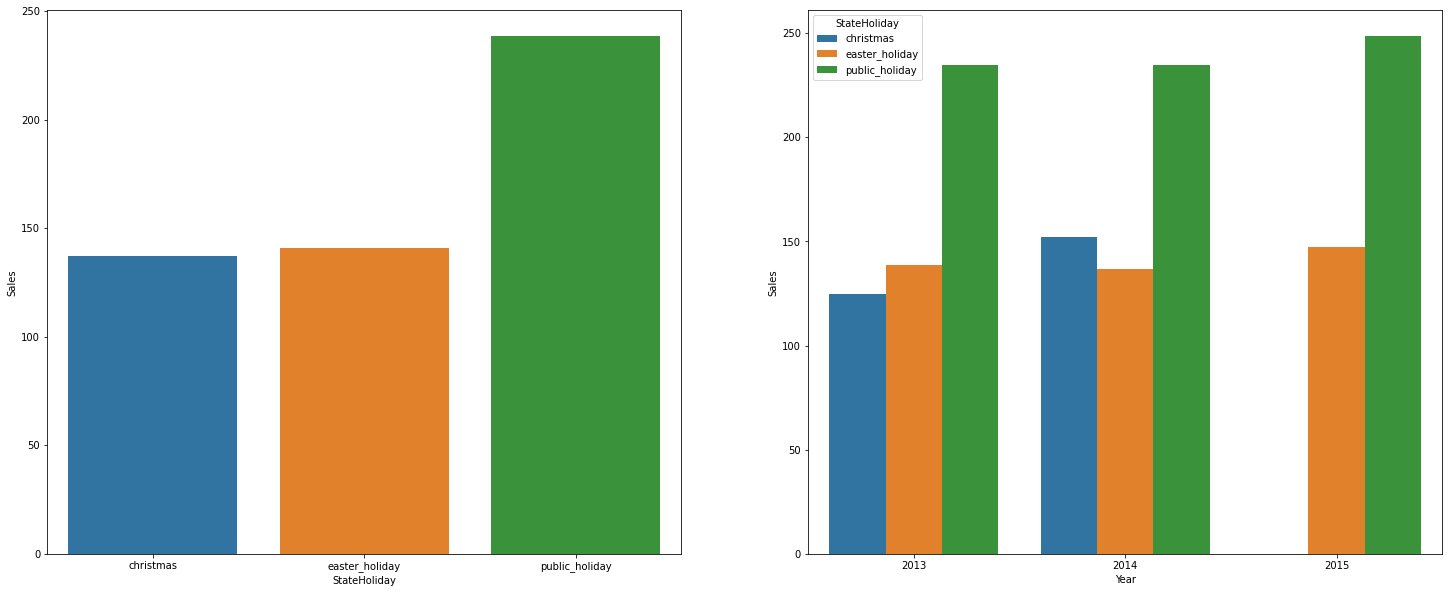

In [186]:
test = df[df['StateHoliday'] != 'regular_day']
test1 = test[['StateHoliday', 'Sales']].groupby( 'StateHoliday' ).mean().reset_index()
plt.figure(figsize=(25,10))
plt.subplot( 1, 2, 1 )
sns.barplot( x='StateHoliday', y='Sales', data=test1 )

plt.subplot( 1, 2, 2 )
test = df[df['StateHoliday'] != 'regular_day']
test2 = test[['Year', 'StateHoliday', 'Sales']].groupby( ['Year', 'StateHoliday'] ).mean().reset_index()
sns.barplot( x='Year', y='Sales', hue='StateHoliday', data=test2 );

#**Stores Sales Over The Years.**

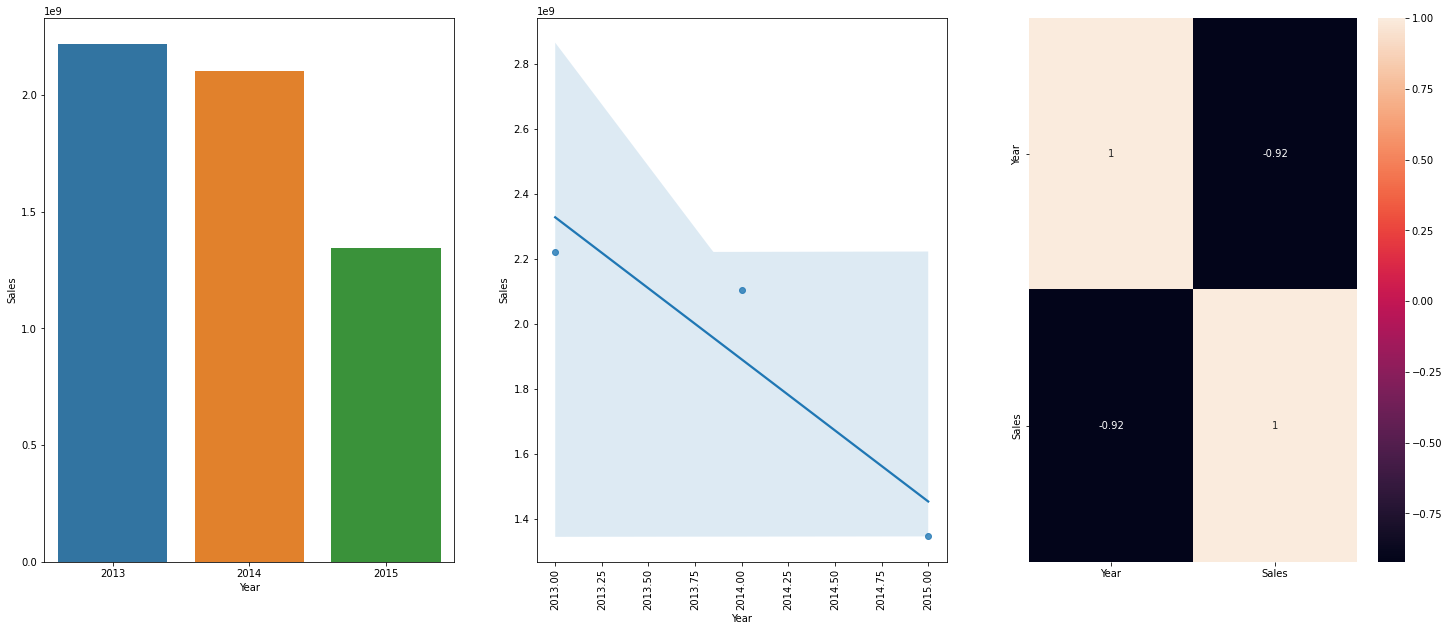

In [187]:
test1 = df[['Year', 'Sales',]].groupby( 'Year' ).sum().reset_index()

plt.figure(figsize=(25,10))
plt.subplot( 1, 3, 1)
sns.barplot( x='Year', y='Sales', data=test1)

plt.subplot(1, 3, 2)
sns.regplot(data = test1, x= 'Year', y= 'Sales');
plt.xticks(rotation = 90)

plt.subplot( 1, 3, 3)
sns.heatmap( test1.corr(method = 'pearson'), annot=True);

####Conclusion-->>


    On average, sales are increasing over the year. Since the correlation is very high,
    this feature is important to the model.

    Since 2015 is no completed yet, it's better to use mean instead of sum.

#**Stores Sales Over Months**

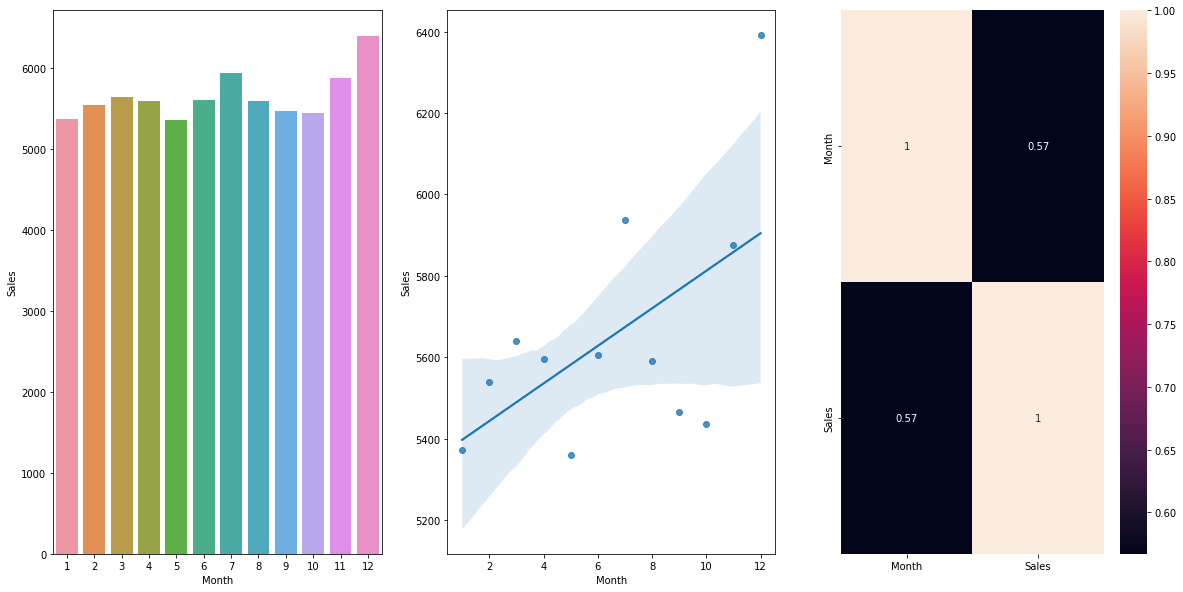

In [188]:
test1 = df[['Month', 'Sales']].groupby( 'Month' ).mean().reset_index()
plt.figure(figsize=(20,10))

plt.subplot( 1, 3, 1 )
sns.barplot( x='Month', y='Sales', data=test1 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='Month', y='Sales', data=test1 );

plt.subplot( 1, 3, 3 )
sns.heatmap( test1.corr( method='pearson' ), annot=True );

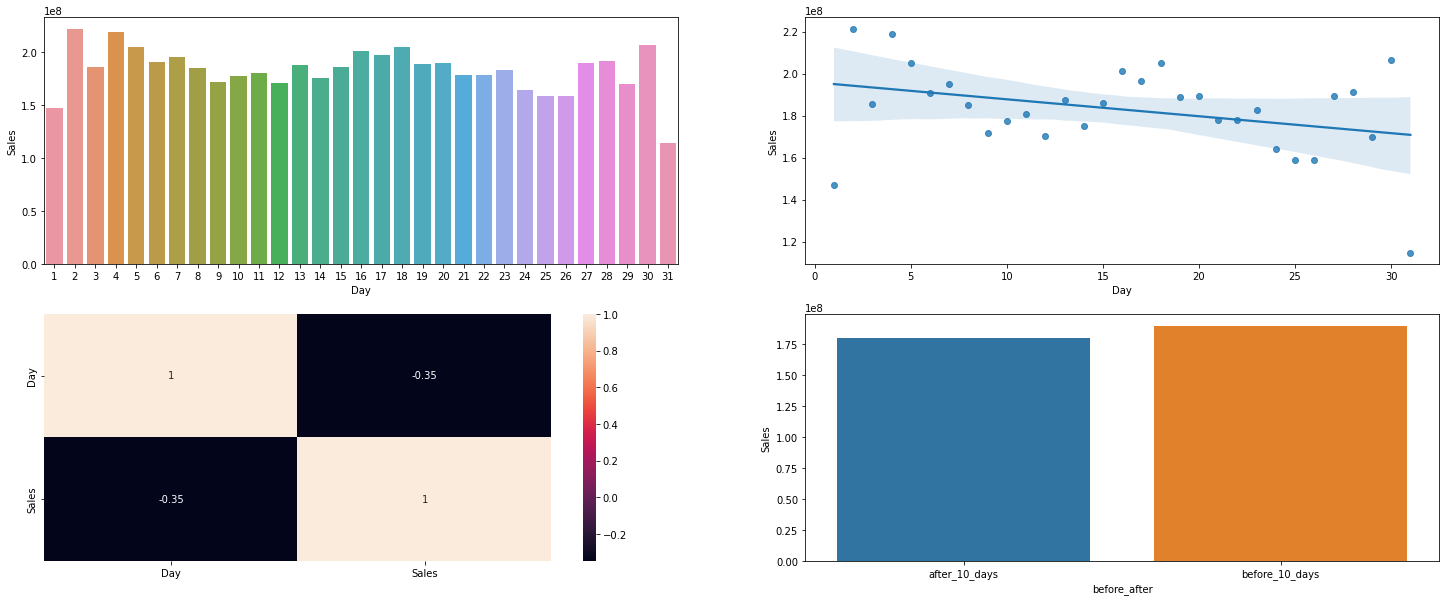

In [189]:
test1 = df[['Day', 'Sales']].groupby( 'Day' ).sum().reset_index()
plt.figure(figsize=(25,10))
plt.subplot( 2, 2, 1 )
sns.barplot( x='Day', y='Sales', data=test1 );

plt.subplot( 2, 2, 2 )
sns.regplot( x='Day', y='Sales', data=test1 );

plt.subplot( 2, 2, 3 )
sns.heatmap( test1.corr( method='pearson' ), annot=True );

#creating a columns to analyse before and after the 10th day
test1['before_after'] = test1['Day'].apply( lambda x: 'before_10_days' if x <= 10 else 'after_10_days')
test2 = test1[['before_after', 'Sales']].groupby( 'before_after' ).mean().reset_index()

plt.subplot( 2, 2, 4 )
sns.barplot( x='before_after', y='Sales', data=test2 );

In [190]:

df['DayOfWeek'].value_counts()

4    144751
5    144561
3    144505
7    144453
2    143937
6    143803
1    141205
Name: DayOfWeek, dtype: int64

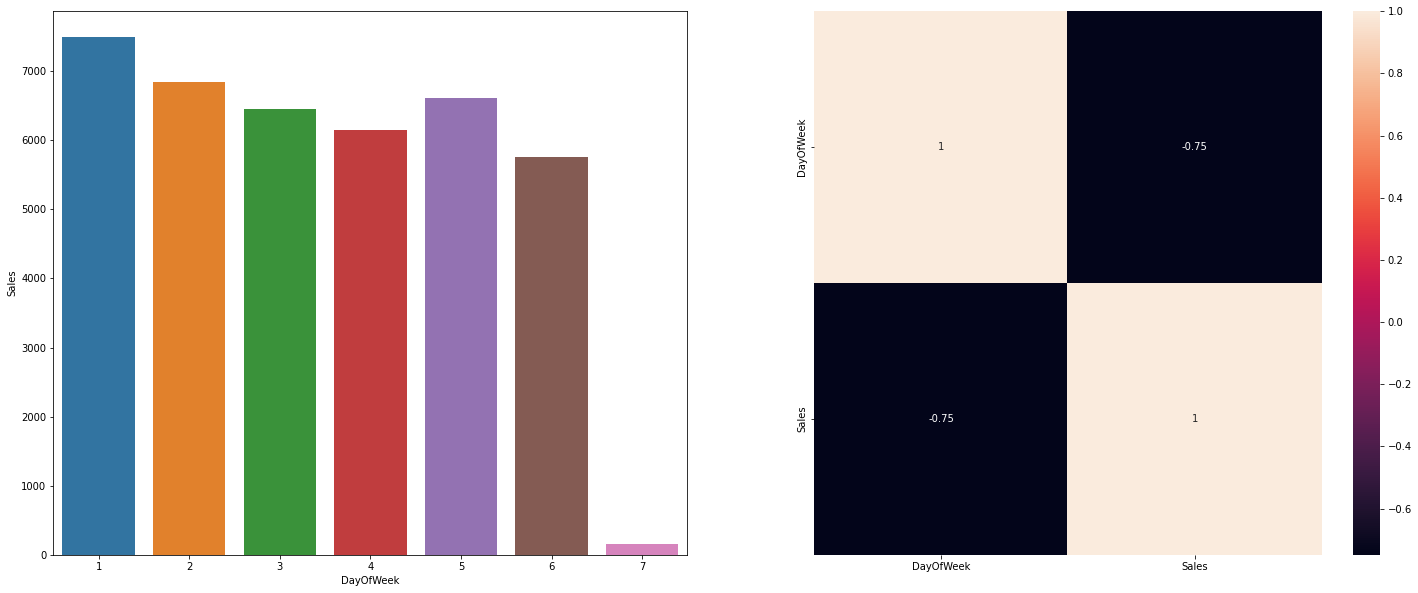

In [191]:
test1 = df[['DayOfWeek', 'Sales']].groupby( 'DayOfWeek' ).mean().reset_index()

plt.figure(figsize=(25,10))
plt.subplot( 1, 2, 1 )
sns.barplot( x='DayOfWeek', y='Sales', data=test1 );

plt.subplot( 1, 2, 2 )
sns.heatmap( test1.corr( method='pearson' ), annot=True );

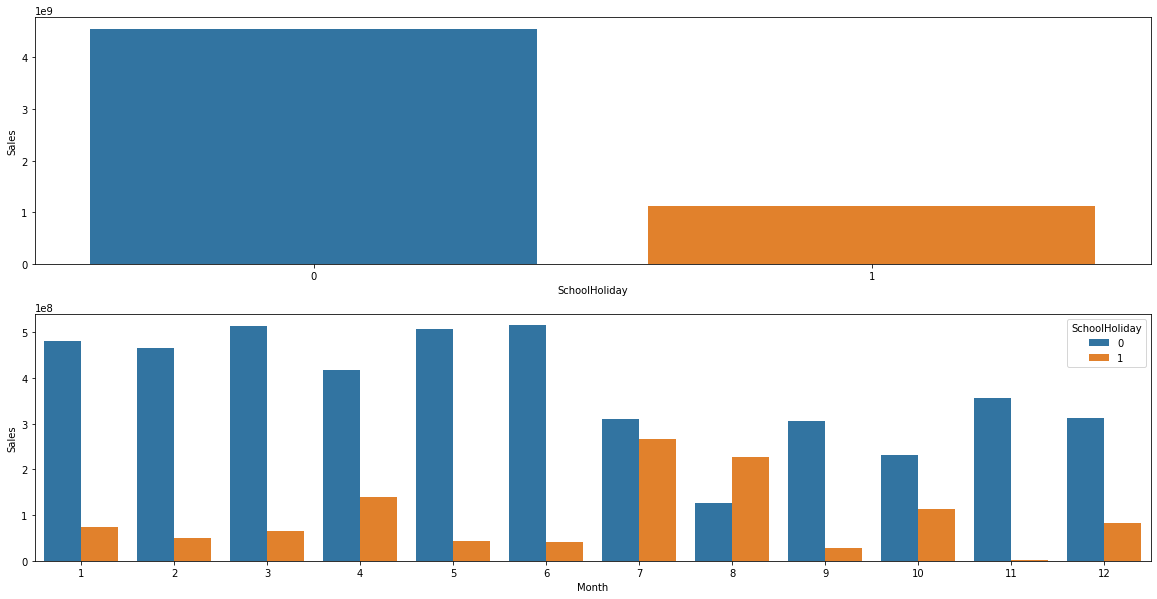

In [192]:
test1 = df[['SchoolHoliday', 'Sales']].groupby( 'SchoolHoliday' ).sum().reset_index()
plt.figure(figsize=(20,10))
plt.subplot( 2, 1, 1 )
sns.barplot( x='SchoolHoliday', y='Sales', data=test1 );

test2 = df[['Month', 'SchoolHoliday', 'Sales']].groupby( ['Month','SchoolHoliday'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='Month', y='Sales', hue='SchoolHoliday', data=test2 );

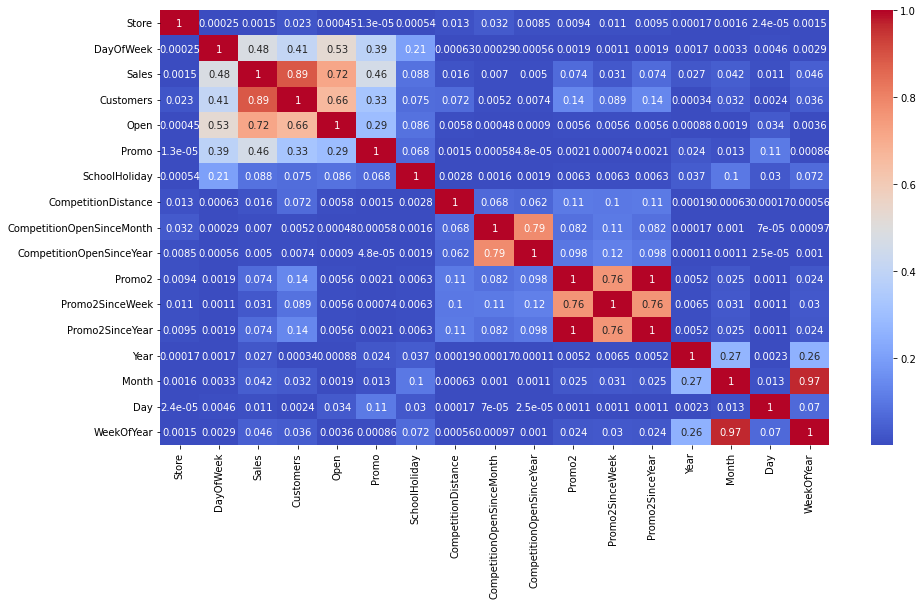

In [193]:
# Plotting Heatmap for the correlation of independent variables with dependent variable 
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [194]:
df.drop('YearWeek', axis=1, inplace= True)

In [195]:
df.drop('PromoInterval' , axis=1, inplace= True) 

In [196]:
df = df[(df['Open'] != 0) & (df['Sales']> 0)]

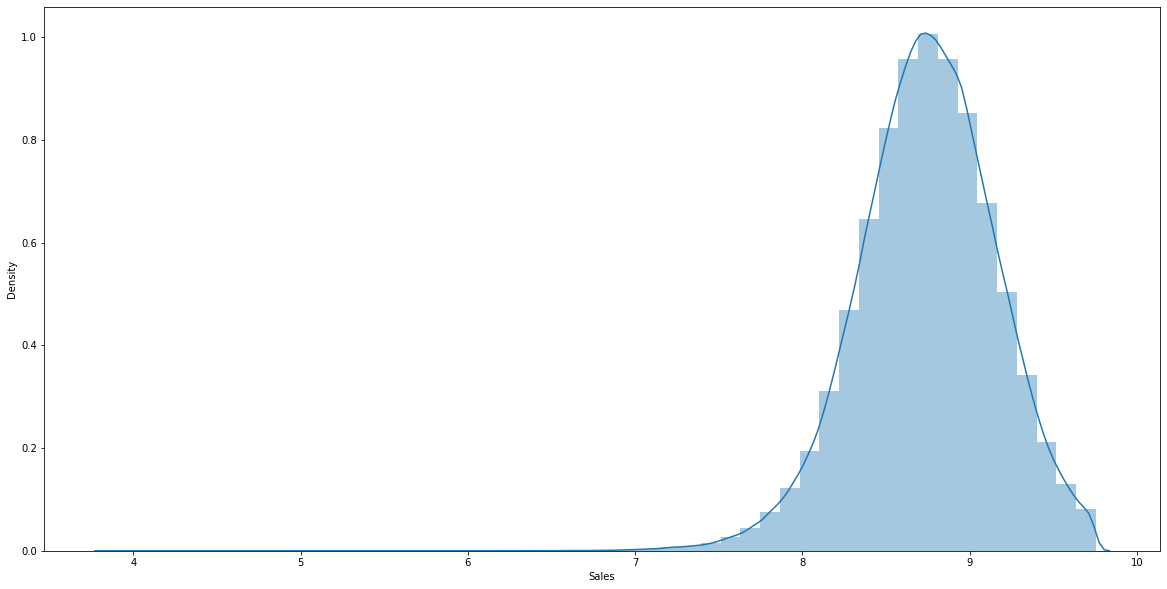

In [197]:
plt.figure(figsize=(20,10))
df['Sales'] = np.log1p( df['Sales'] )
sns.distplot(df['Sales']);

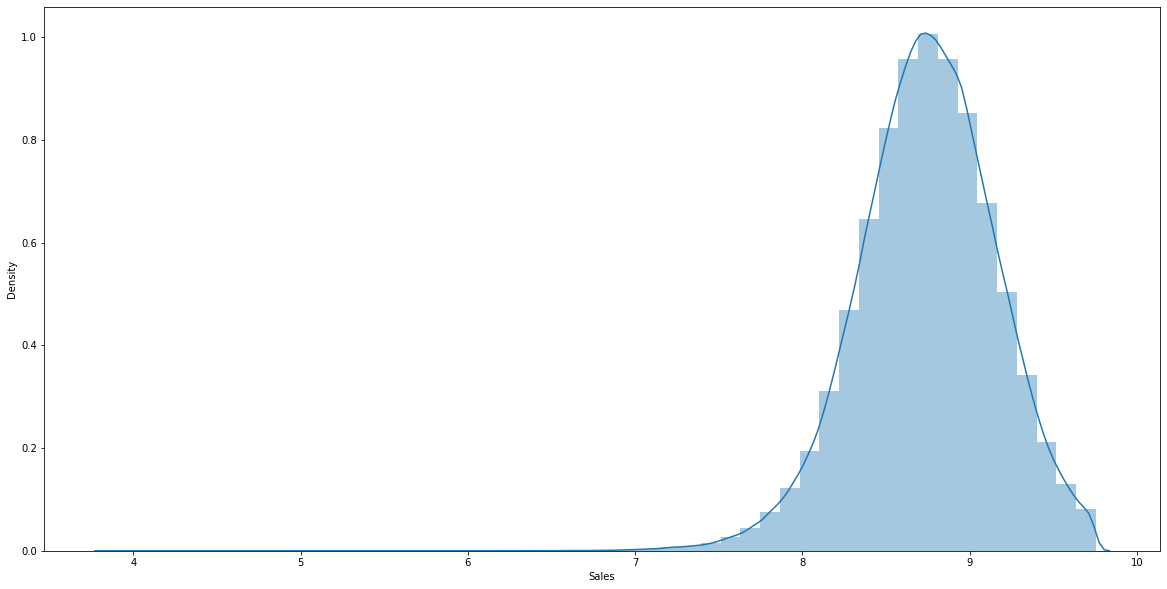

In [198]:
plt.figure(figsize=(20,10))
sns.distplot( df['Sales'] )
plt.show()

In [199]:
df['Sales'] = np.sqrt(df['Sales'])
df['Customers'] = np.sqrt(df['Customers'])
df['CompetitionDistance'] = np.sqrt(df['CompetitionDistance'])

In [200]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day', 'WeekOfYear'],
      dtype='object')

In [201]:
rs = RobustScaler()  #selection of the rescaling method is due to outliers with
                     #Same formula as minmaxScaler, but uses interquatis itervals as range, becoming robust to outliers
mms = MinMaxScaler() #super sensitive to outliers

# competition distance
df['CompetitionDistance'] = rs.fit_transform( df[['CompetitionDistance']].values ) 


# competition time month
df['CompetitionOpenSinceMonth'] = rs.fit_transform( df[['CompetitionOpenSinceMonth']].values )

# promo time week
df['Promo2SinceWeek'] = mms.fit_transform( df[['Promo2SinceWeek']].values )

# date
df['Date'] = mms.fit_transform( df[['Date']].values )

# year
df['Year'] = mms.fit_transform( df[['Year']].values )


In [202]:
df.select_dtypes( include = 'object').head()

,StateHoliday,StoreType,Assortment
0,regular_day,c,basic
1,regular_day,a,basic
2,regular_day,a,basic
3,regular_day,c,extended
4,regular_day,a,basic


In [203]:
# state_holiday (it's a state, holidays are moments) - One Hot Enconding
df = pd.get_dummies(df, prefix = ['StateHoliday'], columns = ['StateHoliday'], dtype = 'int64' )

# store_type - Label Encoder
le = LabelEncoder()
df['StoreType'] = le.fit_transform( df['StoreType'] )


# assortment - Ordinal Encoder
assortment_dict = {'basic': 1, 'extra': 2, 'extended': 3}
df['Assortment'] = df['Assortment'].map( assortment_dict )

In [204]:
dependent_variable = 'Sales'
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
# Create the data of independent variables
x = df[independent_variables].values
# Create the dependent variable data
y = df[dependent_variable].values

In [205]:
y.shape

(834344,)

In [206]:
x.shape

(834344, 23)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834344 entries, 0 to 1017190
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Store                        834344 non-null  int64  
 1   DayOfWeek                    834344 non-null  int64  
 2   Date                         834344 non-null  float64
 3   Sales                        834344 non-null  float64
 4   Customers                    834344 non-null  float64
 5   Open                         834344 non-null  int64  
 6   Promo                        834344 non-null  int64  
 7   SchoolHoliday                834344 non-null  int64  
 8   StoreType                    834344 non-null  int64  
 9   Assortment                   834344 non-null  int64  
 10  CompetitionDistance          834344 non-null  float64
 11  CompetitionOpenSinceMonth    834344 non-null  float64
 12  CompetitionOpenSinceYear     834344 non-null  int64  
 13

In [208]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((667475, 23), (166869, 23), (667475,), (166869,))

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834344 entries, 0 to 1017190
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Store                        834344 non-null  int64  
 1   DayOfWeek                    834344 non-null  int64  
 2   Date                         834344 non-null  float64
 3   Sales                        834344 non-null  float64
 4   Customers                    834344 non-null  float64
 5   Open                         834344 non-null  int64  
 6   Promo                        834344 non-null  int64  
 7   SchoolHoliday                834344 non-null  int64  
 8   StoreType                    834344 non-null  int64  
 9   Assortment                   834344 non-null  int64  
 10  CompetitionDistance          834344 non-null  float64
 11  CompetitionOpenSinceMonth    834344 non-null  float64
 12  CompetitionOpenSinceYear     834344 non-null  int64  
 13

In [210]:
df.isnull().sum()

Store                          0
DayOfWeek                      0
Date                           0
Sales                          0
Customers                      0
Open                           0
Promo                          0
SchoolHoliday                  0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
Year                           0
Month                          0
Day                            0
WeekOfYear                     0
StateHoliday_christmas         0
StateHoliday_easter_holiday    0
StateHoliday_public_holiday    0
StateHoliday_regular_day       0
dtype: int64

In [211]:
# Copy of DataFrame
Final_df = df.copy()

In [212]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [213]:
regressor.intercept_

2.5871152651552025

In [214]:
regressor.coef_

array([ 5.87955768e-04,  1.85853684e-02,  4.69709650e-03, -1.46830421e-12,
        2.98055172e+00,  9.85838353e-03, -1.17568834e-03, -8.75154466e-03,
        1.83777201e-06,  3.02370466e-02, -3.66289027e-02,  1.77485021e-03,
        4.36055971e-02,  4.36219894e-01, -1.48055317e-03, -5.50334346e-01,
        1.27818028e-03, -4.77985081e-06,  8.47727561e-03,  1.68765385e-02,
        9.23640282e-03, -4.20797995e-06, -5.91061803e-04])

In [215]:
y_pred_train = regressor.predict(x_train)

In [216]:
y_train

array([2.97058643, 2.95243347, 2.96245964, ..., 3.02250047, 2.83545452,
       2.84441711])

In [217]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [218]:
#Predicted profit on the test data
y_pred

array([3.03018192, 2.79013849, 2.90225157, ..., 2.93333448, 2.94554403,
       2.86259147])

In [219]:
# Actual profits on test data
y_test

array([3.02189314, 2.74309337, 2.92427792, ..., 2.98305863, 2.976516  ,
       2.8727978 ])

In [220]:
mean_squared_error(y_test, y_pred)

0.0010982051693517825

In [221]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

0.03319265373076299

In [222]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

0.03313917876700904

In [223]:
r2_score(y_train, y_pred_train)

0.7710530581911681

In [224]:
r2_score(y_test, y_pred)

0.7714849570725518

In [225]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

In [226]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [227]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -0.0011018945152935248


In [228]:
y_pred_ridge = ridge_regressor.predict(x_test)

In [229]:
MSE  = mean_squared_error((y_test),(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.0010982051685978385
RMSE : 0.033139178755633616
R2 : 0.7714849572294328
Adjusted R2 :  0.7714534558599957


In [230]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(x_train, y_train)


Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(x_train, y_train)

0.9186945685852174

In [231]:
lasso.coef_

array([ 7.64255567e-07,  7.08312327e-04,  4.49305486e-03,  0.00000000e+00,
        0.00000000e+00,  9.84855602e-03, -1.19167612e-03, -0.00000000e+00,
        1.46533987e-06,  2.98678898e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  8.67780844e-03,  1.09262971e-06,  0.00000000e+00,
        7.00668691e-04, -4.91634533e-06,  8.51204742e-03,  1.64617300e-02,
        9.19940017e-03,  1.52617547e-05, -0.00000000e+00])

In [232]:
MSE  = mean_squared_error((y_test),(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.0010982051685978385
RMSE : 0.033139178755633616
R2 : 0.7714849572294328
Adjusted R2 :  0.7714534558599957


In [233]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.013124731522050667


In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)

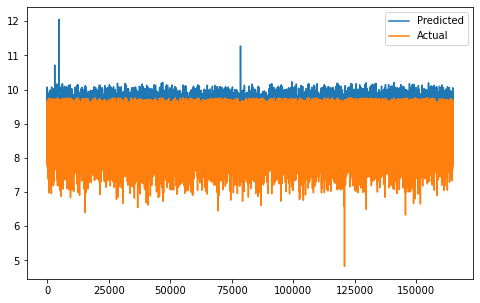

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.013128042634424271
RMSE : 0.11457767074968958
R2 : 0.9187716359835598
Adjusted R2 :  0.9187617844491592


# Implementing Decision Tree

In [234]:
x = Final_df.drop(['Sales'], axis = 1)
y = Final_df['Sales']

In [235]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [236]:
from sklearn import metrics

In [237]:
from sklearn.tree import DecisionTreeRegressor
# Setting parameters for Grid Search
# Criteria
criterion = ['mse']

# Maximum depth of trees
max_depth = [ 10 ,15, 18, 20,  25]

# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'criterion':criterion}

In [238]:
# Create an instance of the Decision Tree Regressor
DTR_model = DecisionTreeRegressor()

# Grid search
DTR_grid = GridSearchCV(estimator = DTR_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2)

DTR_grid.fit(x_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ........................criterion=mse, max_depth=10; total time=   4.7s
[CV] END ........................criterion=mse, max_depth=10; total time=   3.3s
[CV] END ........................criterion=mse, max_depth=10; total time=   3.4s
[CV] END ........................criterion=mse, max_depth=15; total time=   4.5s
[CV] END ........................criterion=mse, max_depth=15; total time=   4.4s
[CV] END ........................criterion=mse, max_depth=15; total time=   4.5s
[CV] END ........................criterion=mse, max_depth=18; total time=   5.2s
[CV] END ........................criterion=mse, max_depth=18; total time=   5.3s
[CV] END ........................criterion=mse, max_depth=18; total time=   5.3s
[CV] END ........................criterion=mse, max_depth=20; total time=   5.7s
[CV] END ........................criterion=mse, max_depth=20; total time=   5.7s
[CV] END ........................criterion=mse, m

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': [10, 15, 18, 20, 25]},
             verbose=2)

In [239]:
DTR_optimal_model = DTR_grid.best_estimator_
DTR_optimal_model

DecisionTreeRegressor(criterion='mse', max_depth=20)

In [240]:
DTR_grid.best_score_

0.9521555187429445

In [241]:
# Predictions Train and Test
DTR_train_pred = DTR_optimal_model.predict(x_train)
DTR_test_pred = DTR_optimal_model.predict(x_test)

In [242]:
# MSE - Test 
mean_squared_error(y_test,DTR_test_pred)

0.00020361939487523198

In [243]:
# R-sqaured for Train
r2_score(y_train, DTR_train_pred)

0.9864658244050635

In [244]:
# R-sqaured for Test
r2_score(y_test, DTR_test_pred)

0.9575450879282468

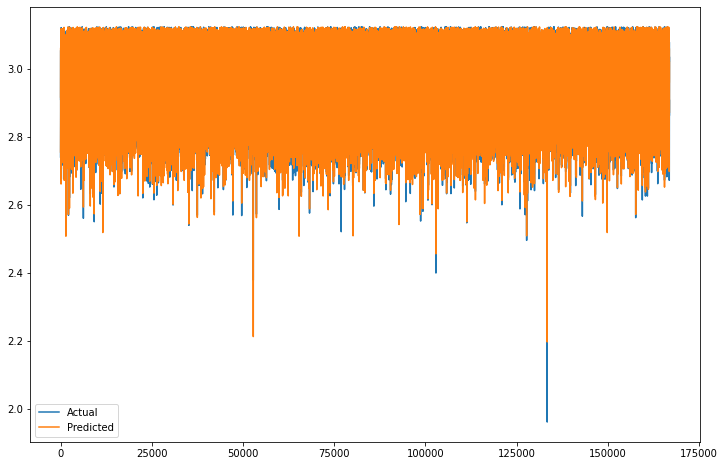

In [245]:
plt.figure(figsize=(12,8))
plt.plot(np.array(y_test))
plt.plot(DTR_test_pred)
plt.legend(["Actual","Predicted"])
plt.show()

# Implementing Random Forest

In [246]:
from sklearn.ensemble import RandomForestRegressor

In [247]:
# Criterion
criterion = ['mse']
# Maximum depth of trees
max_depth = [10,15,18,22]

# Number of estimator
n_estimators = [100, 150]
# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'criterion':criterion,'n_estimators':n_estimators}

param_dict

{'criterion': ['mse'],
 'max_depth': [10, 15, 18, 22],
 'n_estimators': [100, 150]}

In [248]:
# Create an instance of the Decision Tree Regressor
rf_model = RandomForestRegressor()

# Grid search

rf_grid = GridSearchCV(estimator = rf_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2 )

rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ......criterion=mse, max_depth=10, n_estimators=100; total time= 3.8min
[CV] END ......criterion=mse, max_depth=10, n_estimators=100; total time= 3.7min
[CV] END ......criterion=mse, max_depth=10, n_estimators=100; total time= 3.8min
[CV] END ......criterion=mse, max_depth=10, n_estimators=150; total time= 5.9min
[CV] END ......criterion=mse, max_depth=10, n_estimators=150; total time= 5.5min
[CV] END ......criterion=mse, max_depth=10, n_estimators=150; total time= 5.6min
[CV] END ......criterion=mse, max_depth=15, n_estimators=100; total time= 5.0min
[CV] END ......criterion=mse, max_depth=15, n_estimators=100; total time= 4.8min
[CV] END ......criterion=mse, max_depth=15, n_estimators=100; total time= 4.8min
[CV] END ......criterion=mse, max_depth=15, n_estimators=150; total time= 7.3min
[CV] END ......criterion=mse, max_depth=15, n_estimators=150; total time= 7.4min
[CV] END ......criterion=mse, max_depth=15, n_est

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [10, 15, 18, 22],
                         'n_estimators': [100, 150]},
             verbose=2)

In [249]:
rf_grid.best_params_

{'criterion': 'mse', 'max_depth': 22, 'n_estimators': 150}

In [250]:
rf_optimal_model = rf_grid.best_estimator_

In [251]:
y_pred_train_rf = rf_optimal_model.predict(x_train)   # Prediction for train dataset
y_pred_test_rf = rf_optimal_model.predict(x_test)     # Predictionfor test dataset

In [252]:
# MSE 
mean_squared_error(y_test,y_pred_test_rf)

0.00011136980305207533

In [254]:
# r2 Train Score
r2_score((y_train), (y_pred_train_rf))

0.9940009270131877

In [253]:
# r2 Test Score
r2_score((y_test), (y_pred_test_rf))

0.9767792493493974